<a href="https://colab.research.google.com/github/7901ben/Lung-Cancer-Detection/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2022-10-29 14:00:24--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.203
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  13.1MB/s    in 13s     

2022-10-29 14:00:38 (11.4 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [52]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

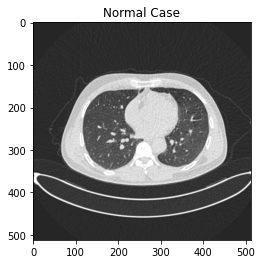

In [3]:
img = cv2.imread("Lung_cancer_dataset/Train/Normal cases/Normal case (8).jpg")
plt.title("Normal Case")
plt.imshow(img)

In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [6]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

Found 970 images belonging to 3 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 107 images belonging to 3 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(3, activation="softmax"))


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 32)        

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

In [14]:
  history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 13s 189ms/step - loss: 0.9825 - accuracy: 0.4845 - val_loss: 0.9531 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 11s 183ms/step - loss: 0.8433 - accuracy: 0.5928 - val_loss: 0.9133 - val_accuracy: 0.5607
Epoch 3/50
61/61 [==============================] - 11s 181ms/step - loss: 0.7011 - accuracy: 0.7103 - val_loss: 1.1778 - val_accuracy: 0.4860
Epoch 4/50
61/61 [==============================] - 12s 195ms/step - loss: 0.5792 - accuracy: 0.7773 - val_loss: 1.1800 - val_accuracy: 0.5607
Epoch 5/50
61/61 [==============================] - 11s 186ms/step - loss: 0.4359 - accuracy: 0.8371 - val_loss: 1.2823 - val_accuracy: 0.5421
Epoch 6/50
61/61 [==============================] - 11s 189ms/step - loss: 0.3554 - accuracy: 0.8649 - val_loss: 1.0257 - val_accuracy: 0.6168
Epoch 7/50
61/61 [==============================] - 11s 186ms/step - loss: 0.2621 - accuracy: 0.8876 - val_loss: 0.8142 - val_accuracy: 0.6729

In [22]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPool2D(3,3))

model1.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(64,(3,3), padding ="same", activation="relu"))
model1.add(MaxPool2D(2,2))



model1.add(Flatten())

model1.add(Dense(32,activation="relu"))

model1.add(Dense(64, activation="relu"))

model1.add(Dense(32,activation="relu"))



model1.add(Dense(3, activation="softmax"))

In [16]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 32)        

In [23]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [25]:
  history=model1.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 12s 191ms/step - loss: 0.9842 - accuracy: 0.5062 - val_loss: 0.9767 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 12s 187ms/step - loss: 0.8940 - accuracy: 0.5577 - val_loss: 0.8917 - val_accuracy: 0.5514
Epoch 3/50
61/61 [==============================] - 12s 188ms/step - loss: 0.6956 - accuracy: 0.7216 - val_loss: 0.9771 - val_accuracy: 0.5421
Epoch 4/50
61/61 [==============================] - 12s 188ms/step - loss: 0.5121 - accuracy: 0.8082 - val_loss: 0.8720 - val_accuracy: 0.6262
Epoch 5/50
61/61 [==============================] - 12s 188ms/step - loss: 0.3967 - accuracy: 0.8526 - val_loss: 0.8123 - val_accuracy: 0.7196
Epoch 6/50
61/61 [==============================] - 11s 187ms/step - loss: 0.3201 - accuracy: 0.8742 - val_loss: 0.7275 - val_accuracy: 0.7477
Epoch 7/50
61/61 [==============================] - 12s 187ms/step - loss: 0.2857 - accuracy: 0.8856 - val_loss: 0.9411 - val_accuracy: 0.6822

In [28]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(64,(3,3), activation="relu"))
model2.add(MaxPool2D(3,3))

model2.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model2.add(MaxPool2D(2,2))





model2.add(Flatten())

model2.add(Dense(32,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(32,activation="relu"))
model2.add(Dropout(0.4))


model2.add(Dense(3, activation="softmax"))

In [29]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 32)       

In [30]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [31]:
  history=model2.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 14s 214ms/step - loss: 1.0084 - accuracy: 0.4598 - val_loss: 0.9541 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 11s 186ms/step - loss: 0.9741 - accuracy: 0.4959 - val_loss: 0.9528 - val_accuracy: 0.5140
Epoch 3/50
61/61 [==============================] - 11s 186ms/step - loss: 0.9389 - accuracy: 0.5000 - val_loss: 0.9209 - val_accuracy: 0.5140
Epoch 4/50
61/61 [==============================] - 11s 185ms/step - loss: 0.8513 - accuracy: 0.5722 - val_loss: 1.0122 - val_accuracy: 0.4860
Epoch 5/50
61/61 [==============================] - 12s 202ms/step - loss: 0.7357 - accuracy: 0.7021 - val_loss: 0.9704 - val_accuracy: 0.5047
Epoch 6/50
61/61 [==============================] - 11s 184ms/step - loss: 0.6280 - accuracy: 0.7680 - val_loss: 1.0338 - val_accuracy: 0.5327
Epoch 7/50
61/61 [==============================] - 11s 187ms/step - loss: 0.4664 - accuracy: 0.8278 - val_loss: 1.4352 - val_accuracy: 0.5234

In [33]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model3.add(MaxPool2D(2,2))

model3.add(Conv2D(64,(3,3), activation="relu"))
model3.add(MaxPool2D(3,3))

model3.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model3.add(MaxPool2D(2,2))





model3.add(Flatten())

model3.add(Dense(32,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation="relu"))
model3.add(Dropout(0.2))


model3.add(Dense(3, activation="softmax"))

In [34]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 32)       

In [35]:
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [36]:
  history=model3.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 13s 196ms/step - loss: 0.9948 - accuracy: 0.4680 - val_loss: 0.9571 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 11s 184ms/step - loss: 0.9597 - accuracy: 0.5031 - val_loss: 0.9605 - val_accuracy: 0.5701
Epoch 3/50
61/61 [==============================] - 11s 185ms/step - loss: 0.9305 - accuracy: 0.5186 - val_loss: 0.9049 - val_accuracy: 0.4860
Epoch 4/50
61/61 [==============================] - 12s 201ms/step - loss: 0.7866 - accuracy: 0.6639 - val_loss: 0.9843 - val_accuracy: 0.4206
Epoch 5/50
61/61 [==============================] - 11s 182ms/step - loss: 0.6446 - accuracy: 0.7546 - val_loss: 1.0647 - val_accuracy: 0.4860
Epoch 6/50
61/61 [==============================] - 11s 186ms/step - loss: 0.4592 - accuracy: 0.8320 - val_loss: 0.8479 - val_accuracy: 0.6449
Epoch 7/50
61/61 [==============================] - 11s 185ms/step - loss: 0.3457 - accuracy: 0.8660 - val_loss: 0.8444 - val_accuracy: 0.5981

In [82]:

model4 = Sequential()

model4.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model4.add(MaxPool2D(2,2))

model4.add(Conv2D(64,(3,3), activation="relu"))
model4.add(MaxPool2D(3,3))

model4.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model4.add(MaxPool2D(2,2))

#model4.res_net_block( 64, 3)



model4.add(Flatten())



model4.add(Dense(32,activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation="relu"))
model4.add(Dropout(0.3))
model4.add(Dense(32,activation="relu"))
model4.add(Dropout(0.4))
model4.add(Dense(32,activation="relu"))
model4.add(Dropout(0.6))


model4.add(Dense(3, activation="softmax"))




In [83]:
model4.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_128 (MaxPooli  (None, 9, 9, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 4, 4, 32)       

In [86]:
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [87]:
  history=model4.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 13s 201ms/step - loss: 1.0595 - accuracy: 0.4536 - val_loss: 0.9710 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 11s 185ms/step - loss: 1.0036 - accuracy: 0.5021 - val_loss: 0.9900 - val_accuracy: 0.5140
Epoch 3/50
61/61 [==============================] - 11s 186ms/step - loss: 0.9812 - accuracy: 0.5021 - val_loss: 0.9554 - val_accuracy: 0.5140
Epoch 4/50
61/61 [==============================] - 12s 190ms/step - loss: 0.9611 - accuracy: 0.4938 - val_loss: 0.9359 - val_accuracy: 0.5140
Epoch 5/50
61/61 [==============================] - 11s 184ms/step - loss: 0.8618 - accuracy: 0.5464 - val_loss: 0.9030 - val_accuracy: 0.4206
Epoch 6/50
61/61 [==============================] - 11s 185ms/step - loss: 0.7937 - accuracy: 0.6392 - val_loss: 0.9966 - val_accuracy: 0.4486
Epoch 7/50
61/61 [==============================] - 11s 184ms/step - loss: 0.6881 - accuracy: 0.7268 - val_loss: 1.0702 - val_accuracy: 0.5234

In [88]:
model5 = Sequential()

model5.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model5.add(MaxPool2D(2,2))

model5.add(Conv2D(64,(3,3), activation="relu"))
model5.add(MaxPool2D(3,3))

model5.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model5.add(MaxPool2D(2,2))

#model5.res_net_block( 64, 3)



model5.add(Flatten())



model5.add(Dense(32,activation="relu"))
#model5.add(Dropout(0.2))
model5.add(Dense(64, activation="relu"))
#model5.add(Dropout(0.3))
model5.add(Dense(32,activation="relu"))
#model5.add(Dropout(0.4))
model5.add(Dense(32,activation="relu"))
#model5.add(Dropout(0.6))


model5.add(Dense(3, activation="softmax"))

In [89]:
model5.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 9, 9, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 4, 4, 32)       

In [90]:
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [91]:
  history=model5.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 12s 192ms/step - loss: 0.9655 - accuracy: 0.5052 - val_loss: 0.9638 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 12s 188ms/step - loss: 0.7564 - accuracy: 0.6784 - val_loss: 1.1427 - val_accuracy: 0.4579
Epoch 3/50
61/61 [==============================] - 11s 187ms/step - loss: 0.6008 - accuracy: 0.7691 - val_loss: 1.1389 - val_accuracy: 0.4393
Epoch 4/50
61/61 [==============================] - 13s 213ms/step - loss: 0.4517 - accuracy: 0.8351 - val_loss: 1.3677 - val_accuracy: 0.6075
Epoch 5/50
61/61 [==============================] - 12s 189ms/step - loss: 0.3317 - accuracy: 0.8680 - val_loss: 1.0031 - val_accuracy: 0.6075
Epoch 6/50
61/61 [==============================] - 14s 225ms/step - loss: 0.2785 - accuracy: 0.8856 - val_loss: 0.9625 - val_accuracy: 0.6168
Epoch 7/50
61/61 [==============================] - 11s 187ms/step - loss: 0.2344 - accuracy: 0.8969 - val_loss: 1.1920 - val_accuracy: 0.6168